# 3D Isostatic Truss

In [1]:
import numpy as np
import sympy as sp
import ema as em
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
model = em.spacetruss(3, 20.0, 10.0, 5.0)
n = model.dnodes
e = model.delems

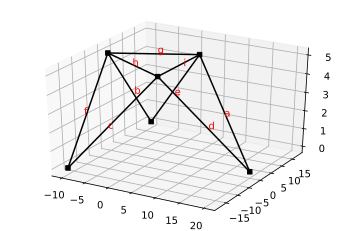

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
em.plot_structure3d(model, ax);

## Set up the static $B_f$ matrix.

In [4]:
for elem in model.elems:
    Dx = elem.nodes[1].x-elem.nodes[0].x
    Dy = elem.nodes[1].y-elem.nodes[0].y
    Dz = elem.nodes[1].z-elem.nodes[0].z
    print("{}: DXYZ = ({:0.2f}, {:0.2f}, {:0.2f}), L = {:0.2f}".format(elem.tag, Dx, Dy, Dz, elem.L))

a: DXYZ = (-15.00, 8.66, 5.00), L = 18.03
b: DXYZ = (-0.00, -17.32, 5.00), L = 18.03
c: DXYZ = (15.00, 8.66, 5.00), L = 18.03
d: DXYZ = (-15.00, -8.66, 5.00), L = 18.03
e: DXYZ = (15.00, -8.66, 5.00), L = 18.03
f: DXYZ = (0.00, 17.32, 5.00), L = 18.03
g: DXYZ = (-15.00, -8.66, 0.00), L = 17.32
h: DXYZ = (15.00, -8.66, 0.00), L = 17.32
i: DXYZ = (-0.00, -17.32, 0.00), L = 17.32


In [5]:
B = em.B_matrix(model)
B.f

,$a_1$,$b_1$,$c_1$,$d_1$,$e_1$,$f_1$,$g_1$,$h_1$,$i_1$
$1$,-0.832050,0.000000,0.000000,0.000000,0.832050,0.000000,0.866025,0.000000,0.0
$2$,0.480384,0.000000,0.000000,0.000000,-0.480384,0.000000,0.500000,0.000000,1.0
$3$,0.277350,0.000000,0.000000,0.000000,0.277350,0.000000,-0.000000,0.000000,-0.0
$4$,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.866025,-0.866025,0.0
$5$,0.000000,-0.960769,0.000000,0.000000,0.000000,0.960769,-0.500000,0.500000,0.0
$6$,0.000000,0.277350,0.000000,0.000000,0.000000,0.277350,0.000000,-0.000000,0.0
$7$,0.000000,0.000000,0.832050,-0.832050,0.000000,0.000000,0.000000,0.866025,-0.0
$8$,0.000000,0.000000,0.480384,-0.480384,0.000000,0.000000,0.000000,-0.500000,-1.0
$9$,0.000000,0.000000,0.277350,0.277350,0.000000,0.000000,0.000000,0.000000,0.0


## Determine the basic element forces for the given loading.

In [6]:
model.nodes[3].p['z'] = -40
model.nodes[4].p['z'] = -40
model.nodes[5].p['z'] = -40

In [7]:
P = em.P_vector(B)
P.f

,$P_{{ffff}}$
$1$,0.0
$2$,0.0
$3$,-40.0
$4$,0.0
$5$,0.0
$6$,-40.0
$7$,0.0
$8$,0.0
$9$,-40.0


In [8]:
# Bf = sp.Matrix(B[:9,:9])
Q = B.bari@P.f
Q

,$Q_{{fffff}}$
$a_1$,-7.211103e+01
$b_1$,-7.211103e+01
$c_1$,-7.211103e+01
$d_1$,-7.211103e+01
$e_1$,-7.211103e+01
$f_1$,-7.211103e+01
$g_1$,-4.000000e-14
$h_1$,1.000000e-14
$i_1$,2.000000e-14


In [9]:
sp.Matrix(np.around(np.linalg.inv(B[:9,:9]),3))

Matrix([
[-0.451,  0.26, 1.803,   -0.3,   0.0,   0.0,  -0.15,  0.26,   0.0],
[ -0.15, -0.26,   0.0,    0.0, -0.52, 1.803,   0.15, -0.26,   0.0],
[  0.15,  0.26,   0.0,    0.3,   0.0,   0.0,  0.451,  0.26, 1.803],
[ -0.15, -0.26,   0.0,   -0.3,   0.0,   0.0, -0.451, -0.26, 1.803],
[ 0.451, -0.26, 1.803,    0.3,   0.0,   0.0,   0.15, -0.26,   0.0],
[  0.15,  0.26,   0.0,    0.0,  0.52, 1.803,  -0.15,  0.26,   0.0],
[ 0.289,   0.5,   0.0, -0.577,   0.0,   0.0, -0.289,   0.5,   0.0],
[-0.289,  -0.5,   0.0, -0.577,   0.0,   0.0,  0.289,  -0.5,   0.0],
[ 0.289,   0.5,   0.0,  0.577,   0.0,   0.0,  0.289,  -0.5,   0.0]])

# Support reactions, Global equilibrium

In [10]:
R = B.d@Q
R

,$P_{{fffff}}$
$10$,-1.200000e+02
$11$,-1.000000e-14
$12$,4.000000e+01
$13$,6.000000e+01
$14$,-1.039230e+02
$15$,4.000000e+01
$16$,6.000000e+01
$17$,1.039230e+02
$18$,4.000000e+01


# Explanation of upper ring zeros.

It can be said that the forces in the upper ring are zero because the appied force vector lies entirely in the column space of a linearly independent submatrix of $B_f$ where the columns pertaining to the upper ring element forces are ommitted. Similarly, it can be stated that the applied force vector lies within the nullspace of the $B_f^{-1}$ submatrix which pertains to the top ring elements. This means that $P_f$ is orthogonal to the row vectors of $B_f^{-1}$ corresponding to the basic forces in the top ring.